In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [17]:
merged_save_path = Path('data') / 'merged'

In [18]:
player_data = pd.read_csv(merged_save_path / 'player_data.csv')
player_data.head()

,player,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,dws,ws,ws/48,obpm,dbpm,bpm,vorp,mvp_share,mvp_rank,first_place_votes
0,Shareef Abdur-Rahim,23,82,82,39.3,7.2,15.6,0.465,0.4,1.2,...,2.6,8.8,0.132,2.6,-0.4,2.2,3.4,0.000,0,0.0
1,Ray Allen,24,82,82,37.4,7.8,17.2,0.455,2.1,5.0,...,1.0,10.1,0.157,4.7,-1.1,3.6,4.3,0.000,0,0.0
2,Darrell Armstrong,31,82,82,31.6,5.9,13.6,0.433,1.7,4.9,...,3.4,8.0,0.149,3.6,0.9,4.5,4.3,0.001,13T,0.0
3,Elton Brand,20,81,80,37.0,7.8,16.1,0.482,0.0,0.0,...,3.3,7.5,0.121,2.2,-0.9,1.3,2.5,0.000,0,0.0
4,Terrell Brandon,29,71,71,36.4,6.8,14.7,0.466,0.7,1.9,...,2.8,8.6,0.159,3.9,0.3,4.3,4.1,0.000,0,0.0


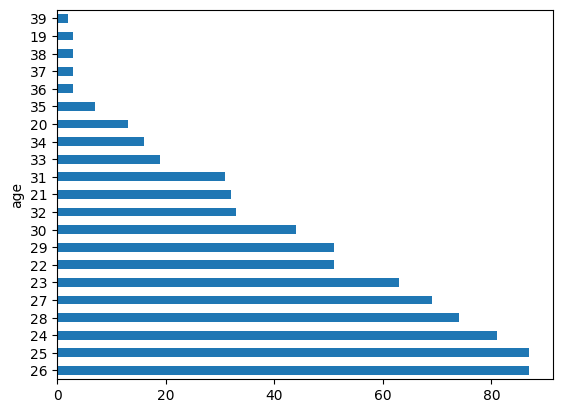

In [19]:
player_data['age'].value_counts().plot.barh()
plt.show()

## Modeling

In [20]:
from model import *

years_test = [2022]
metrics_df = pd.DataFrame()
player_data.head()

,player,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,dws,ws,ws/48,obpm,dbpm,bpm,vorp,mvp_share,mvp_rank,first_place_votes
0,Shareef Abdur-Rahim,23,82,82,39.3,7.2,15.6,0.465,0.4,1.2,...,2.6,8.8,0.132,2.6,-0.4,2.2,3.4,0.000,0,0.0
1,Ray Allen,24,82,82,37.4,7.8,17.2,0.455,2.1,5.0,...,1.0,10.1,0.157,4.7,-1.1,3.6,4.3,0.000,0,0.0
2,Darrell Armstrong,31,82,82,31.6,5.9,13.6,0.433,1.7,4.9,...,3.4,8.0,0.149,3.6,0.9,4.5,4.3,0.001,13T,0.0
3,Elton Brand,20,81,80,37.0,7.8,16.1,0.482,0.0,0.0,...,3.3,7.5,0.121,2.2,-0.9,1.3,2.5,0.000,0,0.0
4,Terrell Brandon,29,71,71,36.4,6.8,14.7,0.466,0.7,1.9,...,2.8,8.6,0.159,3.9,0.3,4.3,4.1,0.000,0,0.0


Loaded models/svm_2022.dat


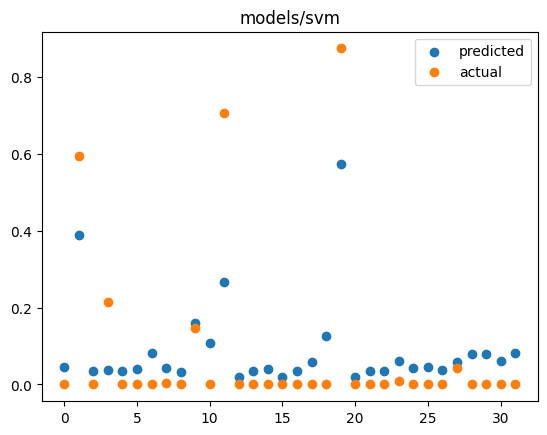

         Player (Actual)  MVP Share (Actual)    Player (models/svm)  \
0           Nikola Jokić               0.875           Nikola Jokić   
0            Joel Embiid               0.706  Giannis Antetokounmpo   
0  Giannis Antetokounmpo               0.595            Joel Embiid   

   MVP Share (models/svm)  
0                0.574087  
0                0.389805  
0                0.266489  
Loaded models/randomforest_2022.dat


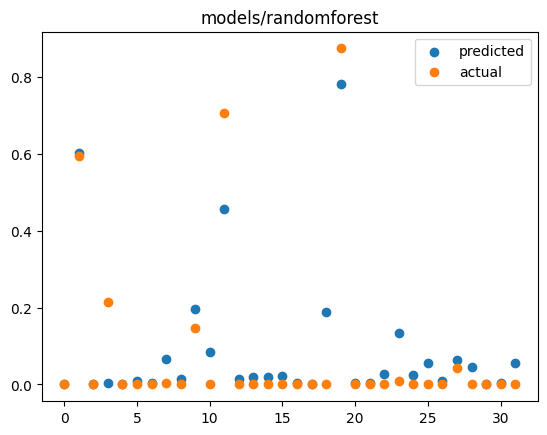

         Player (Actual)  MVP Share (Actual) Player (models/randomforest)  \
0           Nikola Jokić               0.875                 Nikola Jokić   
0            Joel Embiid               0.706        Giannis Antetokounmpo   
0  Giannis Antetokounmpo               0.595                  Joel Embiid   

   MVP Share (models/randomforest)  
0                          0.78344  
0                          0.60232  
0                          0.45806  
Loaded models/elasticnet_2022.dat


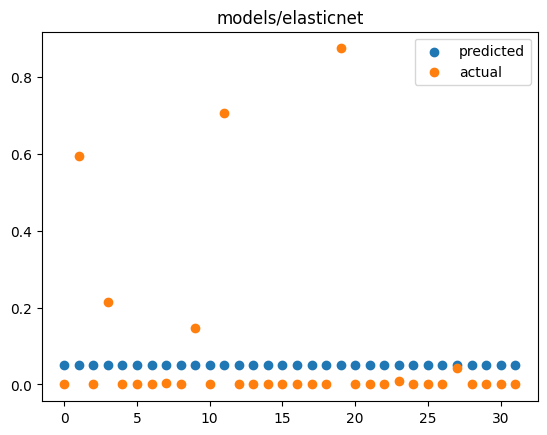

         Player (Actual)  MVP Share (Actual) Player (models/elasticnet)  \
0           Nikola Jokić               0.875                Bam Adebayo   
0            Joel Embiid               0.706      Giannis Antetokounmpo   
0  Giannis Antetokounmpo               0.595             Christian Wood   

   MVP Share (models/elasticnet)  
0                       0.050866  
0                       0.050866  
0                       0.050866  
Loaded models/adaboost_2022.dat


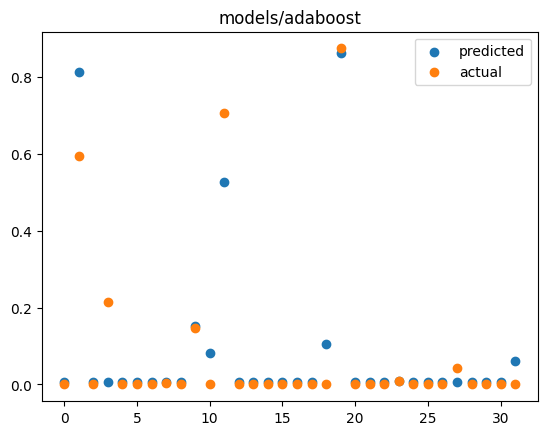

         Player (Actual)  MVP Share (Actual) Player (models/adaboost)  \
0           Nikola Jokić               0.875             Nikola Jokić   
0            Joel Embiid               0.706    Giannis Antetokounmpo   
0  Giannis Antetokounmpo               0.595              Joel Embiid   

   MVP Share (models/adaboost)  
0                     0.863882  
0                     0.814588  
0                     0.527786  
Loaded models/gradboost_2022.dat


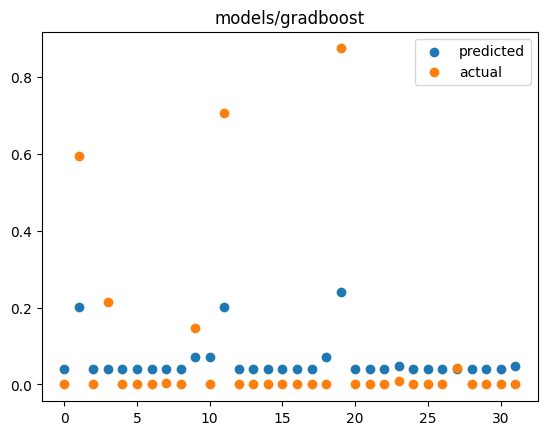

         Player (Actual)  MVP Share (Actual) Player (models/gradboost)  \
0           Nikola Jokić               0.875              Nikola Jokić   
0            Joel Embiid               0.706     Giannis Antetokounmpo   
0  Giannis Antetokounmpo               0.595               Joel Embiid   

   MVP Share (models/gradboost)  
0                      0.241596  
0                      0.202197  
0                      0.202197  


,Model,Year,RMSE,R2
0,models/svm,2022,0.117495,0.700860
0,models/randomforest,2022,0.077365,0.870305
0,models/elasticnet,2022,0.216962,-0.020004
0,models/adaboost,2022,0.067964,0.899911
0,models/gradboost,2022,0.167085,0.395068


In [21]:
model_path = Path('models')
list_paths2022 = [
    model_path / 'svm_2022.dat',
    model_path / 'randomforest_2022.dat',
    model_path / 'elasticnet_2022.dat',
    model_path / 'adaboost_2022.dat',
    model_path / 'gradboost_2022.dat'
]

list_paths2023 = [
    model_path / 'svm_2023.dat',
    model_path / 'randomforest_2023.dat',
    model_path / 'elasticnet_2023.dat',
    model_path / 'adaboost_2023.dat',
    model_path / 'gradboost_2023.dat'
]

load_model(player_data, list_paths2022, [2022])

Loaded models/svm_2023.dat


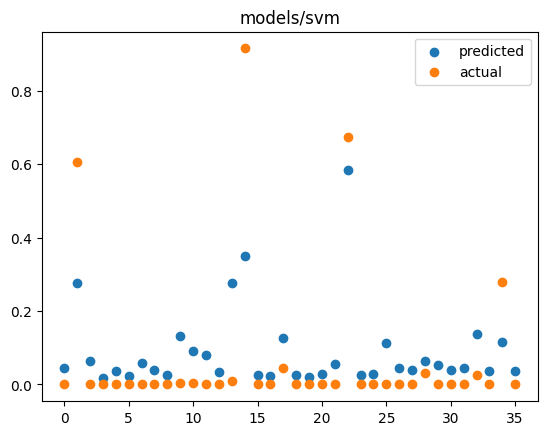

         Player (Actual)  MVP Share (Actual)    Player (models/svm)  \
0            Joel Embiid               0.915           Nikola Jokić   
0           Nikola Jokić               0.674            Joel Embiid   
0  Giannis Antetokounmpo               0.606  Giannis Antetokounmpo   

   MVP Share (models/svm)  
0                0.584418  
0                0.348684  
0                0.275921  
Loaded models/randomforest_2023.dat


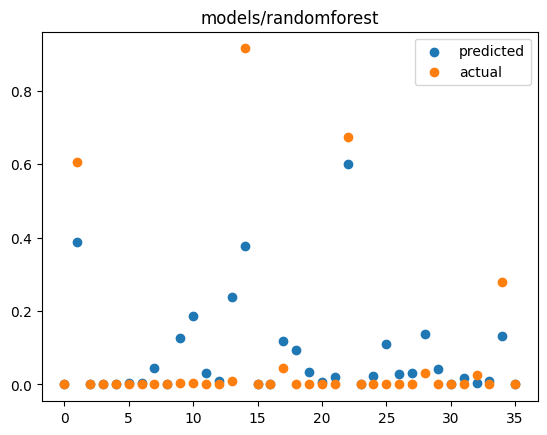

         Player (Actual)  MVP Share (Actual) Player (models/randomforest)  \
0            Joel Embiid               0.915                 Nikola Jokić   
0           Nikola Jokić               0.674        Giannis Antetokounmpo   
0  Giannis Antetokounmpo               0.606                  Joel Embiid   

   MVP Share (models/randomforest)  
0                          0.60120  
0                          0.38724  
0                          0.37664  
Loaded models/elasticnet_2023.dat


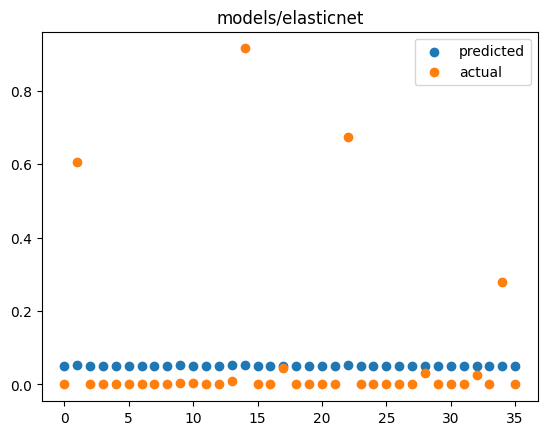

         Player (Actual)  MVP Share (Actual) Player (models/elasticnet)  \
0            Joel Embiid               0.915               Nikola Jokić   
0           Nikola Jokić               0.674                Joel Embiid   
0  Giannis Antetokounmpo               0.606                Luka Dončić   

   MVP Share (models/elasticnet)  
0                       0.052137  
0                       0.051862  
0                       0.051739  
Loaded models/adaboost_2023.dat


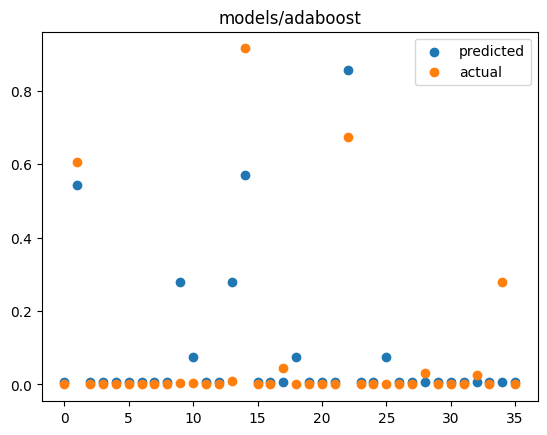

         Player (Actual)  MVP Share (Actual) Player (models/adaboost)  \
0            Joel Embiid               0.915             Nikola Jokić   
0           Nikola Jokić               0.674              Joel Embiid   
0  Giannis Antetokounmpo               0.606    Giannis Antetokounmpo   

   MVP Share (models/adaboost)  
0                     0.855842  
0                     0.569773  
0                     0.543533  
Loaded models/gradboost_2023.dat


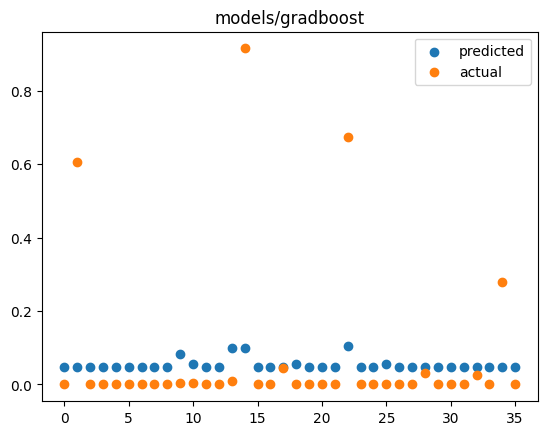

         Player (Actual)  MVP Share (Actual) Player (models/gradboost)  \
0            Joel Embiid               0.915              Nikola Jokić   
0           Nikola Jokić               0.674               Joel Embiid   
0  Giannis Antetokounmpo               0.606               Luka Dončić   

   MVP Share (models/gradboost)  
0                      0.105584  
0                      0.098166  
0                      0.098166  


,Model,Year,RMSE,R2
0,models/svm,2023,0.132682,0.591972
0,models/randomforest,2023,0.119335,0.669936
0,models/elasticnet,2023,0.208571,-0.008253
0,models/adaboost,2023,0.105329,0.742867
0,models/gradboost,2023,0.199437,0.078119


In [15]:
load_model(player_data, list_paths2023, [2023])

### Support Vector Regression

In [ ]:
metrics_df = svm_model(player_data, metrics_df, years_test)

### Random Forest

In [ ]:
metrics_df = random_forest_model(player_data, metrics_df, years_test)

### ElasticNet

In [ ]:
metrics_df = elastic_net_model(player_data, metrics_df, years_test)

### AdaBoost

In [ ]:
metrics_df = adaboost_model(player_data, metrics_df, years_test)

### Gradient Boost

In [ ]:
metrics_df = gradientboost_model(player_data, metrics_df, years_test)

### Final Results

In [ ]:
metrics_df